<h1><center><u>TOXIC COMMENT CLASSIFICATION</u></center></h1>


### Data source: 
https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

### Introduction:
In the twenty-first century, social media has provided many work openings while also serving as a special platform for people to publicly share their views. Meanwhile, certain individuals within these users are leveraging the power of this platform and exploiting their right to enforce their poisonous mentality. Because of this issue people stop expressing themselves and give up on seeking different opinions.

### Objectives:
Build a multi-headed model capable of detecting and assigning probabilities for different types of of toxicity such as: 
1. toxic
2. severe toxic
3. obscene
4. threat
5. insult
6. identity hate

The dataset comprises of comments from Wikipedia's talk page (ie. discussion) pages.

#### Importing the libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer, WordNetLemmatizer
import seaborn as sns
import matplotlib.cm as cm
import itertools

import re
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud

from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix
from statistics import mean
from sklearn.model_selection import GridSearchCV

import statistics

from wordcloud import WordCloud
from collections import Counter
from sklearn import metrics

from sklearn.metrics import classification_report

#### Loading the dataset

In [8]:
df = pd.read_csv('train.csv')

PermissionError: [Errno 13] Permission denied: 'train.csv'

In [4]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [5]:
df.shape

(159571, 8)

In [6]:
df.columns #pirnting the names of each columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [7]:
df.dtypes #checking the datatypes of each label

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [8]:
df.isnull().sum() #finding null values if any

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [9]:
df.info() #to print index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [10]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [11]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Finding the counts of non_hate (clean) comments in the dataset
rsum=df.iloc[:,2:].sum(axis=1)
df['non_hate']=(rsum==0)
df['non_hate'].sum()

143346

In [13]:
# Total no.of toxic comments
len(df[df['toxic']==1])

15294

In [14]:
df.head(10) #Printing the data frame after adding non_hate coloumn

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,True
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,False
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,True
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,True
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,True


In [15]:
#Creating a new dataset of the data by only taking the 2nd column onwards (comments and categories)
df_count=df.iloc[:,2:].sum()
df_count

toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
non_hate         143346
dtype: int64

# Visualisation of the dataset 

In [16]:
#creating a list with the names of labels to use it in the following codes.
test_labels = ["toxic", "severe_toxic", "obscene",
               "threat", "insult", "identity_hate"]

Plot showing the counts of each labels is made below

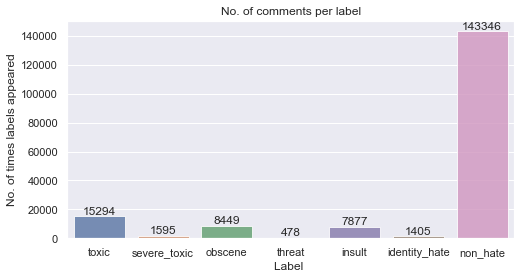

In [213]:
plt.figure(figsize=(8,4))

# Plotting a bar chart using the index (category values) and the count of each category. alpha = 0.8 to make the bars more translucent
ax = sns.barplot(df_count.index, df_count.values, alpha=0.8)

plt.title("No. of comments per label")
plt.ylabel('No. of times labels appeared', fontsize=12)
plt.xlabel('Label ', fontsize=12)

#Adding labels for each bar
rects = ax.patches
labels = df_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

Above bar graph indicates that there is large number of comments which are clean, which might make a class imbalance issue with the model.

Created a plot below to know the length of the comments and we can see that only a few comments are longer than 1000 words.

<AxesSubplot:xlabel='comment_text'>

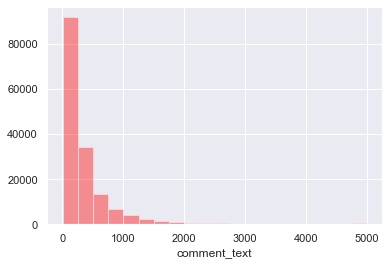

In [18]:
sns.set(color_codes=True)
comment_len = df.comment_text.str.len()
sns.distplot(comment_len, kde=False, bins=20, color="red")

From the above graph, we can see that there is only a few comments which are longer than 1000 words

<AxesSubplot:>

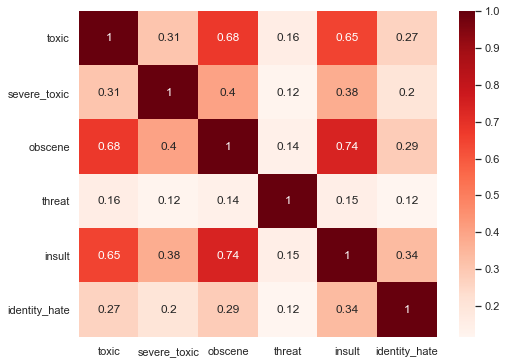

In [19]:
# Cross correlation matrix across labels
rowsums = df.iloc[:, 2:].sum(axis=1)
temp = df.iloc[:, 2:-1]
train_corr = temp[rowsums > 0]
corr = train_corr.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot=True, cmap="Reds")

As seen in the cross-correlation matrix, there is no or very less correlation between threat and severe toxic, it seems like threat is more of a sudden

On the other hand, we can see that there is a high correlation between obscene and insult. It indicates that there is high probablitiy of obscene comments to be insulting.

#### Creating a wordcloud

Here we can see the most common words used in a label

In [20]:
def WCloud(token):
    threat_context = df[df[token] == 1]
    threat_text = threat_context.comment_text
    neg_text = pd.Series(threat_text).str.cat(sep=' ')
    wordcloud = WordCloud(width=1600, height=800,
                          max_font_size=200, background_color="black").generate(neg_text)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud.recolor(colormap="Reds"), interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Most common words assosiated with {token} comment", size=20)
    plt.show()

Enter the label name to view the most frequent words to that label:toxic


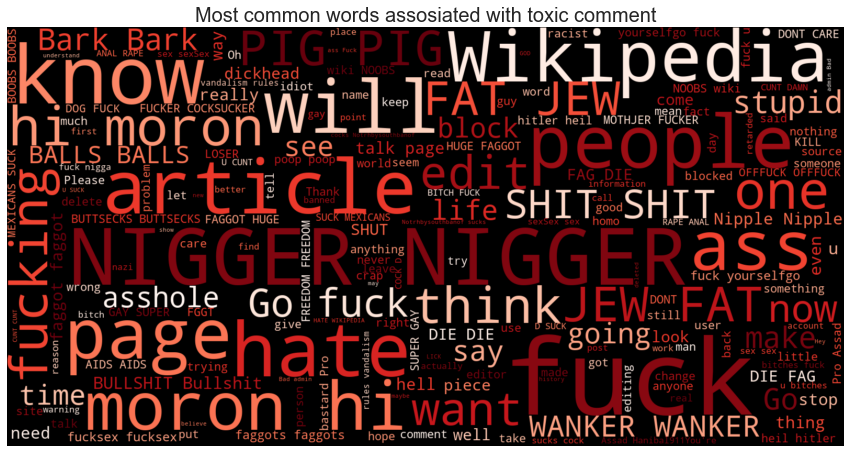

In [21]:
# Enter the label name to generate the wordcloud
token = input(
    'Enter the label name to view the most frequent words to that label:')
WCloud(token.lower())

In [22]:
df.comment_text[0] #printing the first comment in dataframe

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [23]:
df.describe(include='all')

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_hate
count,159571,159571,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571
unique,159571,159571,NaN,NaN,NaN,NaN,NaN,NaN,2
top,3f8917f4a8d8b952,REDIRECT Talk:Romeo's Blue Skies,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,143346
mean,NaN,NaN,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,NaN
std,NaN,NaN,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


Dropping a large portion clean comments(non_hate) to make sure that my laptop gpu can run without running out of memory 

In [24]:
df.head()
dataset_clean=df['non_hate']
clean_df=df[dataset_clean==True]
clean_df=clean_df.head(16000) #Taking only first 16000 clean comments
names=df[df['non_hate']==True].index
df.drop(names , inplace=True)
df=pd.concat([df,clean_df])
df.reset_index(drop=True, inplace=True)

In [214]:
#Finding the number of clean comments by adding the sum of each row
rowsums=df.iloc[:,2:].sum(axis=1)
df['non_hate']=(rowsums==0)
df['non_hate'].sum()

16000

In [26]:
df.shape

(32225, 9)

### Data Preprocessing

Here I will be removing numbers (if any), making all the capital letters to lower case, replacing all punctuations and '\n' (newline) with white space.

In [27]:
# Removing numbers from the comment text
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

#Removing punctuations and replacing it with white space, also converting all characters to lower case
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Removing all '\n' in the comment text and replacing it with a white space
remove_n = lambda x: re.sub("\n", " ", x)

# Removing all characters which are non ascii 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Mapping all the above lambda functions with the comment text coloumn
df['comment_text'] = df['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

#printing the comment text
df['comment_text'][1]

'hey    what is it       talk   what is it    an exclusive group of some wp talibans   who are good at destroying  self appointed purist who gang up any one who asks them questions abt their anti social and destructive  non  contribution at wp   ask sityush to clean up his behavior than issue me nonsensical warnings   '

## Experiment 1

#### In the first experiment, I will be comparing the normalization techniques, that is, Stemming and Lemmatising at the output. 
#### Here stemming will be reducing the words to its root word, but it might not produce a meaningful word and Lemmatization means reducing the words to a meaningful word.

 

In [28]:
#Stemming
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus_s = []
for i in range(0, len(df)):
    ste = df['comment_text'][i]
    ste = ste.split()
    ste = [ps.stem(word) for word in ste if not word in stopwords.words('english')]
    ste = ' '.join(ste)
    corpus_s.append(ste)
    

In [29]:
corpus_s[1]

'hey talk exclus group wp taliban good destroy self appoint purist gang one ask question abt anti social destruct non contribut wp ask sityush clean behavior issu nonsens warn'

In [30]:
#Lemitising
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
ls = WordNetLemmatizer()
corpus_l = []
for i in range(0, len(df)):
    lema = df['comment_text'][i]
    lema = lema.split()
    lema = [ls.lemmatize(word) for word in lema if word not in set(stopwords.words('english'))]
    lema = ' '.join(lema)
    corpus_l.append(lema)

In [31]:
corpus_l[1]

'hey talk exclusive group wp taliban good destroying self appointed purist gang one asks question abt anti social destructive non contribution wp ask sityush clean behavior issue nonsensical warning'

**Here I will be using TfidfVectorizer for vectorising the words in comment text. TfidfVectorizer is same as CountVectorizer which is followed by TfidfTransformer. It will convert a collection of raw documents to a matrix of TF-IDF features[1].**

**The main reason behind using TfidfVectorizer isntead of CountVectorizer is that it will consider overall document weightage of a word. It helps us in dealing with most frequent words which will be there in this dataset since it is taken from wikpedia so common words like page, edit will be appearing many times.**

In [217]:
#Defining the vectoriser function
def vect(cor):
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf_v=TfidfVectorizer(max_features=2000,ngram_range=(2,4))
    X=tfidf_v.fit_transform(cor).toarray()
    print("After the variation, we can take a look at some of the features and parameters below")
    print("\nFeatures:",tfidf_v.get_feature_names()[:20])
    print("\nParameters:",tfidf_v.get_params())
    return X

In [84]:
X_s=vect(corpus_s)#Vectorizing the stemmed corpus

After the variation, we can take a look at some of the features and parameters below

Features: ['abus power', 'abus power proof', 'abus power proof latinu', 'act like', 'ad articl', 'ad talk', 'ad talk contrib', 'add inform', 'add inform articl', 'add inform articl would', 'admin bad', 'admin bad admin', 'admin bad admin bad', 'admin eat', 'admin eat shit', 'admin eat shit cunt', 'admin power', 'administr prick', 'administr prick fire', 'administr prick fire administr']

Parameters: {'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.float64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': 2000, 'min_df': 1, 'ngram_range': (2, 4), 'norm': 'l2', 'preprocessor': None, 'smooth_idf': True, 'stop_words': None, 'strip_accents': None, 'sublinear_tf': False, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'use_idf': True, 'vocabulary': None}


In [85]:
X_s.shape

(32225, 2000)

In [86]:
y_s=df.iloc[:,2:8] #taking the 6 labels and its column values

In [87]:
y_s.shape

(32225, 6)

**Dividing dataset into Train and Test (70-30)**

In [88]:
from sklearn.model_selection import train_test_split
def split(Xt,yt):
    X_train, X_test, y_train, y_test = train_test_split(Xt, yt, test_size=0.30, random_state=0)
    return X_train,X_test,y_train,y_test

In [89]:
X_train_s,X_test_s,y_train_s,y_test_s=split(X_s,y_s) #calling split function to divide the dataset into train and test by 70-30

In [90]:
X_train_s.shape

(22557, 2000)

In [91]:
X_test_s.shape

(9668, 2000)

In [92]:
y_train_s.shape

(22557, 6)

In [93]:
y_test_s.shape

(9668, 6)

**Defining a function plot_confusion_matrix for confusion matrix.[2]**

In [94]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Here the model which we use is Multinomial Naive Bayes. It suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.[3]

In [220]:
classifier=MultinomialNB()
def mnb(X_train,X_test, y_train, y_test):
    fs=[]  
    y=[]
    for i in test_labels:
        classifier.fit(X_train, y_train[i])
        pred = classifier.predict(X_test)
        score = metrics.accuracy_score(y_test[i], pred)
        print("accuracy of",i,":",score*100)
        F1_score=f1_score(y_test[i],pred)
        fs.append(F1_score)
        #print("F1 score of",i,":",F1_score)
        class_report=classification_report(y_test[i], pred)
        print('This is the confusion matrix for',i)
        print(class_report)
        cm = metrics.confusion_matrix(y_test[i], pred)
        plot_confusion_matrix(cm,classes=[i,"Normal"])
        y.append(i)
        plt.show()
    print("Plot showing the f1 score of the labels")
    fig = plt.figure()
    bx = fig.add_axes([0,0,1,1])
    bx.bar(y,fs)
    


accuracy of toxic : 63.56019859329748
This is the confusion matrix for toxic
              precision    recall  f1-score   support

           0       0.60      0.92      0.73      5119
           1       0.78      0.31      0.45      4549

    accuracy                           0.64      9668
   macro avg       0.69      0.62      0.59      9668
weighted avg       0.69      0.64      0.60      9668

Confusion matrix, without normalization


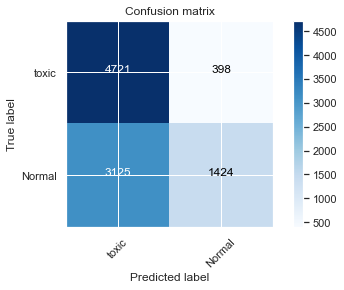

accuracy of severe_toxic : 95.1179147703765
This is the confusion matrix for severe_toxic
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9191
           1       0.53      0.09      0.15       477

    accuracy                           0.95      9668
   macro avg       0.74      0.54      0.56      9668
weighted avg       0.93      0.95      0.93      9668

Confusion matrix, without normalization


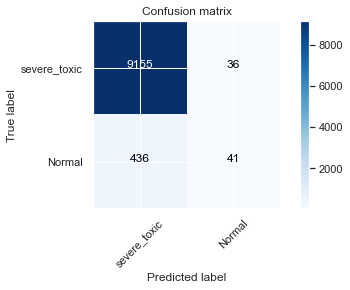

accuracy of obscene : 79.89242863053371
This is the confusion matrix for obscene
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      7159
           1       0.88      0.26      0.40      2509

    accuracy                           0.80      9668
   macro avg       0.84      0.62      0.64      9668
weighted avg       0.82      0.80      0.76      9668

Confusion matrix, without normalization


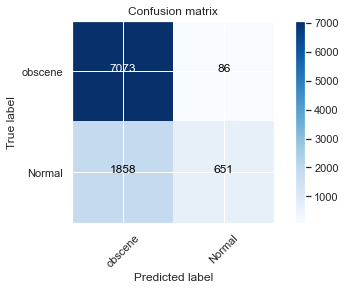

accuracy of threat : 98.18990484071163
This is the confusion matrix for threat
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9524
           1       0.08      0.02      0.03       144

    accuracy                           0.98      9668
   macro avg       0.53      0.51      0.51      9668
weighted avg       0.97      0.98      0.98      9668

Confusion matrix, without normalization


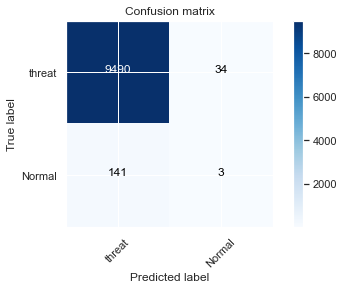

accuracy of insult : 80.20273065784029
This is the confusion matrix for insult
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      7330
           1       0.78      0.25      0.38      2338

    accuracy                           0.80      9668
   macro avg       0.79      0.61      0.63      9668
weighted avg       0.80      0.80      0.76      9668

Confusion matrix, without normalization


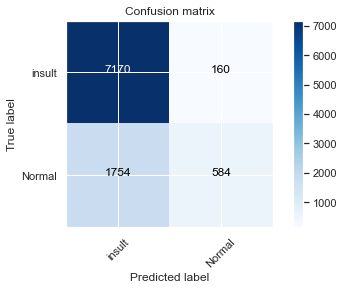

accuracy of identity_hate : 95.23169218038892
This is the confusion matrix for identity_hate
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      9255
           1       0.10      0.01      0.03       413

    accuracy                           0.95      9668
   macro avg       0.53      0.50      0.50      9668
weighted avg       0.92      0.95      0.93      9668

Confusion matrix, without normalization


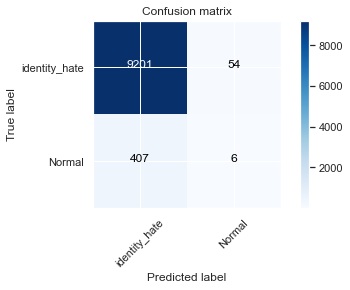

Plot showing the f1 score of the labels


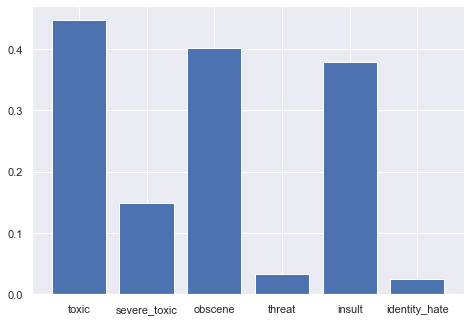

In [221]:
mnb(X_train_s,X_test_s, y_train_s, y_test_s)#

In [222]:
X_l=vect(corpus_l) #Vectorizing the lemmitised corpus

After the variation, we can take a look at some of the features and parameters below

Features: ['abusing power', 'abusing power proof', 'abusing power proof latinus', 'act like', 'acting like', 'add information', 'add information article', 'add information article would', 'added article', 'added talk', 'added talk contribs', 'admin bad', 'admin bad admin', 'admin bad admin bad', 'admin power', 'administrator prick', 'administrator prick fire', 'administrator prick fire administrator', 'admins eat', 'admins eat shit']

Parameters: {'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.float64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': 2000, 'min_df': 1, 'ngram_range': (2, 4), 'norm': 'l2', 'preprocessor': None, 'smooth_idf': True, 'stop_words': None, 'strip_accents': None, 'sublinear_tf': False, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'use_idf': True, 'vocabulary': None}


In [98]:
X_l.shape

(32225, 2000)

In [99]:
y_l=df.iloc[:,2:8]

In [100]:
X_train_l,X_test_l,y_train_l,y_test_l=split(X_l,y_l)

Calling the model function after Lemmatising

accuracy of toxic : 61.812163839470415
This is the confusion matrix for toxic
              precision    recall  f1-score   support

           0       0.59      0.92      0.72      5119
           1       0.76      0.27      0.40      4549

    accuracy                           0.62      9668
   macro avg       0.68      0.60      0.56      9668
weighted avg       0.67      0.62      0.57      9668

Confusion matrix, without normalization


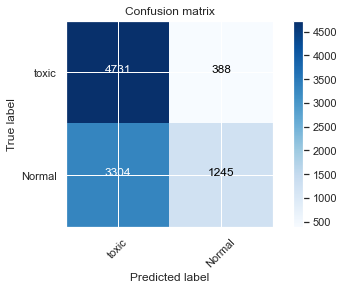

accuracy of severe_toxic : 95.13860157219693
This is the confusion matrix for severe_toxic
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9191
           1       0.55      0.08      0.14       477

    accuracy                           0.95      9668
   macro avg       0.75      0.54      0.56      9668
weighted avg       0.93      0.95      0.93      9668

Confusion matrix, without normalization


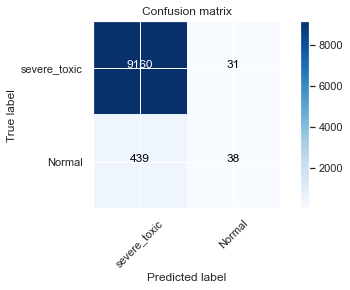

accuracy of obscene : 78.63053371948698
This is the confusion matrix for obscene
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      7159
           1       0.86      0.21      0.34      2509

    accuracy                           0.79      9668
   macro avg       0.82      0.60      0.61      9668
weighted avg       0.80      0.79      0.73      9668

Confusion matrix, without normalization


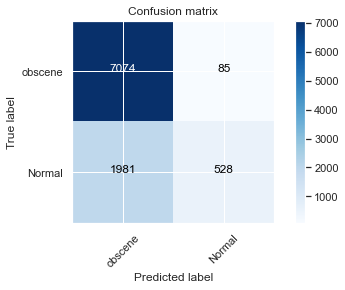

accuracy of threat : 98.20024824162185
This is the confusion matrix for threat
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9524
           1       0.08      0.02      0.03       144

    accuracy                           0.98      9668
   macro avg       0.53      0.51      0.51      9668
weighted avg       0.97      0.98      0.98      9668

Confusion matrix, without normalization


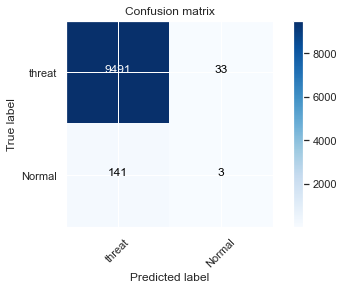

accuracy of insult : 79.34422838229209
This is the confusion matrix for insult
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      7330
           1       0.77      0.21      0.33      2338

    accuracy                           0.79      9668
   macro avg       0.78      0.59      0.60      9668
weighted avg       0.79      0.79      0.75      9668

Confusion matrix, without normalization


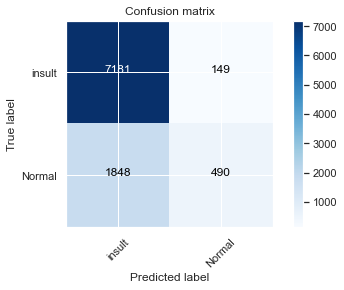

accuracy of identity_hate : 95.32478278858089
This is the confusion matrix for identity_hate
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9255
           1       0.13      0.02      0.03       413

    accuracy                           0.95      9668
   macro avg       0.54      0.51      0.50      9668
weighted avg       0.92      0.95      0.94      9668

Confusion matrix, without normalization


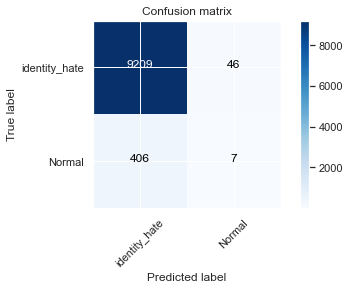

Plot showing the f1 score of the labels


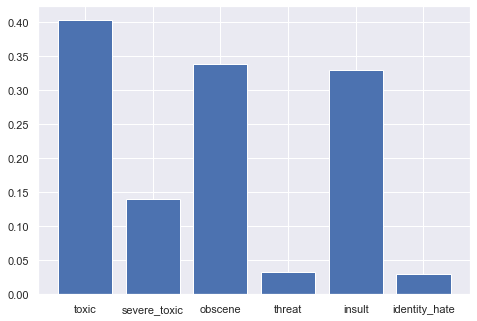

In [103]:
mnb(X_train_l,X_test_l, y_train_l, y_test_l)

##### Conclusion
After compiling the codes and comparing it, I found that, using lemmitsation technique for normalising the words I got better accuracy and f1 score than stemming. Even though, the f1 scores are very less and they are having minute differences among lemmitising and stemming. This is found due to class imbalance issue which will be resolved in the next experiment.

# Experiment 2

#### In this experiment, we will be changing the max_features value of TfidfVectorizer which is used to extract the words which appears more frequent in the comments.

##### In the last experiment, we found that the F1 value is very less, which is due to imbalance issue in the dataset. So in this experiment we will be sorting out the issue by removing imbalances in the class. 

#### From the very above information about the dataset, we can see that around 10% of the comments are toxic or any of its form which will cause class imbalance.

####  By making the proportion of toxic comments at least 20% (preferably 50%) in the possible cases in relation to non toxic comments to a subset, we can overcome the class imbalance issue.

#### Me and my group members discussed about the issue with class imbalance and we have decided to split the dataset into six labels

From the first experiment we found that when I performed lemmitisation, I got more accuracy and good f1 score compared to stemming. So in this experiment, we will do lemmitising.

In [104]:
#Lemmitising
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
ls = WordNetLemmatizer()
for i in range(0, len(df)):
        lema = df['comment_text'][i]
        lema = lema.split()
        lema = [ls.lemmatize(word) for word in lema if word not in set(stopwords.words('english'))]
        df['comment_text'][i] = ' '.join(lema)

###### Splitting the dataset into 6 parts. 

In [105]:
df_tox = df.loc[:,['id','comment_text','toxic']]

In [106]:
df_tox['comment_text'][1]

'hey talk exclusive group wp taliban good destroying self appointed purist gang one asks question abt anti social destructive non contribution wp ask sityush clean behavior issue nonsensical warning'

In [107]:
df_sev = df.loc[:,['id','comment_text','severe_toxic']]
df_obs = df.loc[:,['id','comment_text','obscene']]
df_thr = df.loc[:,['id','comment_text','threat']]
df_ins = df.loc[:,['id','comment_text','insult']]
df_ide = df.loc[:,['id','comment_text','identity_hate']]

From now, we can take 5000 toxic comments and can be concatenate them row-wise with the comments which are non toxic so that now we can get a balanced dataset.

In [108]:
df_tox_1 = df_tox[df_tox['toxic'] == 1].iloc[0:5000,:]
df_tox_0 = df_tox[df_tox['toxic'] == 0].iloc[0:5000,:]
df_tox_done = pd.concat([df_tox_1, df_tox_0], axis=0)
df_tox_done.shape

(10000, 3)

In [109]:
df_sev[df_sev['severe_toxic'] == 1].count() #Finding the number of sever_toxic comments

id              1595
comment_text    1595
severe_toxic    1595
dtype: int64

In [110]:
    df_sev_1 = df_sev[df_sev['severe_toxic'] == 1].iloc[0:1595,:]
df_sev_0 = df_sev[df_sev['severe_toxic'] == 0].iloc[0:1595,:]
df_sev_done = pd.concat([df_sev_1, df_sev_0], axis=0)
df_sev_done.shape

(3190, 3)

In [111]:
df_obs[df_obs['obscene'] == 1].count() #Finding the number of obscene comments

id              8449
comment_text    8449
obscene         8449
dtype: int64

In [112]:
df_obs_1 = df_obs[df_obs['obscene'] == 1].iloc[0:5000,:]
df_obs_0 = df_obs[df_obs['obscene'] == 0].iloc[0:5000,:]
df_obs_done = pd.concat([df_obs_1, df_obs_0], axis=0)
df_obs_done.shape

(10000, 3)

In [113]:
df_thr[df_thr['threat'] == 1].count() #Finding the number of threat comments

id              478
comment_text    478
threat          478
dtype: int64

In [114]:
df_thr_1 = df_thr[df_thr['threat'] == 1].iloc[0:478,:]

# Only 478 threat comments are there which will be considered as 20%, remaining 80% can be no threat comments (1912)
df_thr_0 = df_thr[df_thr['threat'] == 0].iloc[0:1912,:]  
df_thr_done = pd.concat([df_thr_1, df_thr_0], axis=0)
df_thr_done.shape

(2390, 3)

In [115]:
df_ins[df_ins['insult'] == 1].count() #Finding the number of insult comments

id              7877
comment_text    7877
insult          7877
dtype: int64

In [116]:
df_ins_1 = df_ins[df_ins['insult'] == 1].iloc[0:5000,:]
df_ins_0 = df_ins[df_ins['insult'] == 0].iloc[0:5000,:]
df_ins_done = pd.concat([df_ins_1, df_ins_0], axis=0)
df_ins_done.shape

(10000, 3)

In [117]:
df_ide[df_ide['identity_hate'] == 1].count() #Finding the number of identity_hate comments

id               1405
comment_text     1405
identity_hate    1405
dtype: int64

In [118]:
df_ide_1 = df_ide[df_ide['identity_hate'] == 1].iloc[0:1405,:] 
df_ide_0 = df_ide[df_ide['identity_hate'] == 0].iloc[0:1405,:] 
df_ide_done = pd.concat([df_ide_1, df_ide_0], axis=0)
df_ide_done['comment_text'][1]

'hey talk exclusive group wp taliban good destroying self appointed purist gang one asks question abt anti social destructive non contribution wp ask sityush clean behavior issue nonsensical warning'

###### Taking only 1000 features in the TfidfVectorizer 

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
def v1(text):
    tfidf_v=TfidfVectorizer(max_features=1000,ngram_range=(2,4))
    y=tfidf_v.fit_transform(text).toarray()
    return y

Calling the function v1() for each label which has taken a maximum of 1000 features from the comment text.

In [120]:
X_tox_v1=v1(df_tox_done['comment_text'])
X_tox_v1.shape

(10000, 1000)

In [121]:
X_sev_v1=v1(df_sev_done['comment_text'])
X_sev_v1.shape

(3190, 1000)

In [122]:
X_obs_v1=v1(df_obs_done['comment_text'])
X_obs_v1.shape

(10000, 1000)

In [123]:
X_thr_v1=v1(df_thr_done['comment_text'])
X_thr_v1.shape

(2390, 1000)

In [124]:
X_ins_v1=v1(df_ins_done['comment_text'])
X_ins_v1.shape

(10000, 1000)

In [125]:
X_ide_v1=v1(df_ide_done['comment_text'])
X_ide_v1.shape

(2810, 1000)

In [126]:
y_tox_v1=df_tox_done['toxic'] #Extracting only the corresponding label's column
y_sev_v1=df_sev_done['severe_toxic']
y_obs_v1=df_obs_done['obscene']
y_thr_v1=df_thr_done['threat']
y_ins_v1=df_ins_done['insult']
y_ide_v1=df_ide_done['identity_hate']

Calling the split() to divide into train and test dataset (70-30)

In [127]:
X_train_tox_v1,X_test_tox_v1,y_train_tox_v1,y_test_tox_v1=split(X_tox_v1,y_tox_v1)
X_train_sev_v1,X_test_sev_v1,y_train_sev_v1,y_test_sev_v1=split(X_sev_v1,y_sev_v1)
X_train_obs_v1,X_test_obs_v1,y_train_obs_v1,y_test_obs_v1=split(X_obs_v1,y_obs_v1)
X_train_thr_v1,X_test_thr_v1,y_train_thr_v1,y_test_thr_v1=split(X_thr_v1,y_thr_v1)
X_train_ins_v1,X_test_ins_v1,y_train_ins_v1,y_test_ins_v1=split(X_ins_v1,y_ins_v1)
X_train_ide_v1,X_test_ide_v1,y_train_ide_v1,y_test_ide_v1=split(X_ide_v1,y_ide_v1)

In [128]:
X_train_thr_v1.shape

(1673, 1000)

In [129]:
X_test_tox_v1.shape

(3000, 1000)

Defining a function with the same model which I used in the first experiment, ie, Multinomial NB


In [168]:
def conf(X_train_v,X_test_v,y_train_v,y_test_v, label):
    classifier.fit(X_train_v, y_train_v)
    preds = classifier.predict(X_test_v)
    score = metrics.accuracy_score(y_test_v, preds)
    class_report=classification_report(y_test_v, preds)
    F1_score=f1_score(y_test_v, preds)
    print('This is the confusion metrics for',label)
    print(class_report)
    #print(F1_score)
    cm = metrics.confusion_matrix(y_test_v ,preds)
    plot_confusion_matrix(cm,classes=[i,"Normal"]) 
    plt.show()
    return F1_score

This is the confusion metrics for toxic
              precision    recall  f1-score   support

           0       0.54      0.92      0.68      1489
           1       0.75      0.22      0.34      1511

    accuracy                           0.57      3000
   macro avg       0.64      0.57      0.51      3000
weighted avg       0.64      0.57      0.51      3000

Confusion matrix, without normalization


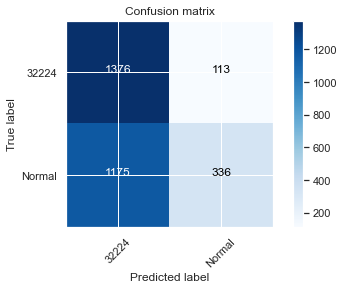

This is the confusion metrics for severe_toxic
              precision    recall  f1-score   support

           0       0.54      0.93      0.69       458
           1       0.81      0.29      0.43       499

    accuracy                           0.59       957
   macro avg       0.68      0.61      0.56       957
weighted avg       0.68      0.59      0.55       957

Confusion matrix, without normalization


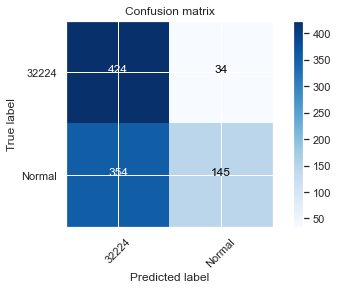

This is the confusion metrics for obscene
              precision    recall  f1-score   support

           0       0.54      0.98      0.69      1489
           1       0.88      0.18      0.30      1511

    accuracy                           0.57      3000
   macro avg       0.71      0.58      0.50      3000
weighted avg       0.71      0.57      0.49      3000

Confusion matrix, without normalization


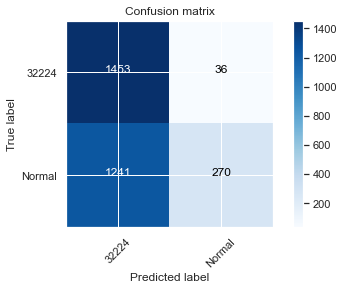

This is the confusion metrics for threat
              precision    recall  f1-score   support

           0       0.54      0.92      0.68      1489
           1       0.75      0.22      0.34      1511

    accuracy                           0.57      3000
   macro avg       0.64      0.57      0.51      3000
weighted avg       0.64      0.57      0.51      3000

Confusion matrix, without normalization


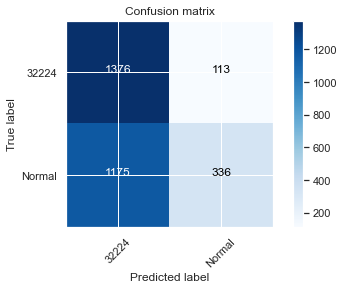

This is the confusion metrics for insult
              precision    recall  f1-score   support

           0       0.54      0.94      0.69      1489
           1       0.78      0.20      0.32      1511

    accuracy                           0.57      3000
   macro avg       0.66      0.57      0.50      3000
weighted avg       0.66      0.57      0.50      3000

Confusion matrix, without normalization


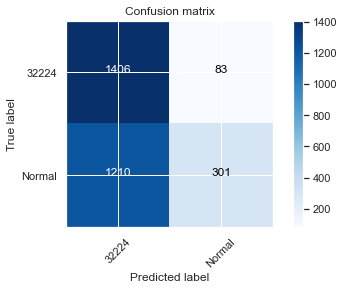

This is the confusion metrics for identity_hate
              precision    recall  f1-score   support

           0       0.53      0.87      0.66       412
           1       0.67      0.26      0.37       431

    accuracy                           0.55       843
   macro avg       0.60      0.56      0.51       843
weighted avg       0.60      0.55      0.51       843

Confusion matrix, without normalization


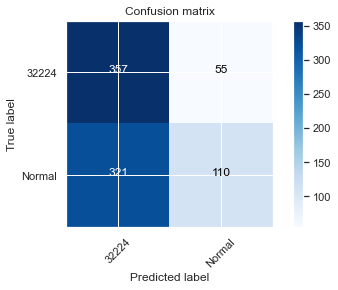

In [216]:
bm_v1=[] #Making a list with the f1 scores each labels
bm_v1.append(conf(X_train_tox_v1,X_test_tox_v1,y_train_tox_v1,y_test_tox_v1,'toxic'))
bm_v1.append(conf(X_train_sev_v1,X_test_sev_v1,y_train_sev_v1,y_test_sev_v1,'severe_toxic'))
bm_v1.append(conf(X_train_obs_v1,X_test_obs_v1,y_train_obs_v1,y_test_obs_v1,'obscene'))
bm_v1.append(conf(X_train_tox_v1,X_test_tox_v1,y_train_tox_v1,y_test_tox_v1,'threat'))
bm_v1.append(conf(X_train_ins_v1,X_test_ins_v1,y_train_ins_v1,y_test_ins_v1,'insult'))
bm_v1.append(conf(X_train_ide_v1,X_test_ide_v1,y_train_ide_v1,y_test_ide_v1,'identity_hate'))

###### Defining another vectorizer function with max_features=20000

In [137]:
def v2(text):
    tfidf_v=TfidfVectorizer(max_features=20000,ngram_range=(2,4))
    z=tfidf_v.fit_transform(text).toarray()
    return z

Calling the function v1() for each label which has taken a maximum of 20000 features from the comment text.

In [138]:
X_tox_v2=v2(df_tox_done['comment_text'])
X_sev_v2=v2(df_sev_done['comment_text'])
X_obs_v2=v2(df_obs_done['comment_text'])
X_thr_v2=v2(df_thr_done['comment_text'])
X_ins_v2=v2(df_ins_done['comment_text'])
X_ide_v2=v2(df_ide_done['comment_text'])

In [139]:
y_tox_v2=df_tox_done['toxic'] #Extracting only the corresponding label's column
y_sev_v2=df_sev_done['severe_toxic']
y_obs_v2=df_obs_done['obscene']
y_thr_v2=df_thr_done['threat']
y_ins_v2=df_ins_done['insult']
y_ide_v2=df_ide_done['identity_hate']

Calling the split() to divide into train and test dataset (70-30)

In [140]:
X_train_tox_v2,X_test_tox_v2,y_train_tox_v2,y_test_tox_v2=split(X_tox_v2,y_tox_v2)
X_train_sev_v2,X_test_sev_v2,y_train_sev_v2,y_test_sev_v2=split(X_sev_v2,y_sev_v2)
X_train_obs_v2,X_test_obs_v2,y_train_obs_v2,y_test_obs_v2=split(X_obs_v2,y_obs_v2)
X_train_thr_v2,X_test_thr_v2,y_train_thr_v2,y_test_thr_v2=split(X_thr_v2,y_thr_v2)
X_train_ins_v2,X_test_ins_v2,y_train_ins_v2,y_test_ins_v2=split(X_ins_v2,y_ins_v2)
X_train_ide_v2,X_test_ide_v2,y_train_ide_v2,y_test_ide_v2=split(X_ide_v2,y_ide_v2)

This is the confusion metrics for toxic
              precision    recall  f1-score   support

           0       0.66      0.78      0.71      1489
           1       0.73      0.60      0.66      1511

    accuracy                           0.69      3000
   macro avg       0.69      0.69      0.69      3000
weighted avg       0.69      0.69      0.69      3000

Confusion matrix, without normalization


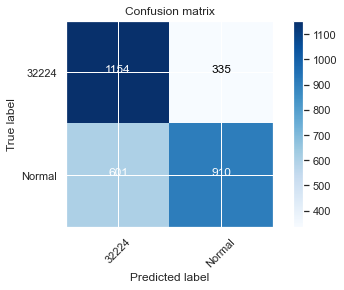

This is the confusion metrics for severe_toxic
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       458
           1       0.72      0.69      0.70       499

    accuracy                           0.69       957
   macro avg       0.69      0.70      0.69       957
weighted avg       0.70      0.69      0.70       957

Confusion matrix, without normalization


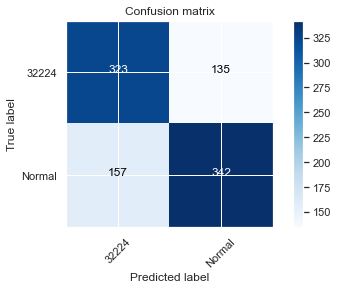

This is the confusion metrics for obscene
              precision    recall  f1-score   support

           0       0.63      0.78      0.70      1489
           1       0.72      0.54      0.62      1511

    accuracy                           0.66      3000
   macro avg       0.67      0.66      0.66      3000
weighted avg       0.67      0.66      0.66      3000

Confusion matrix, without normalization


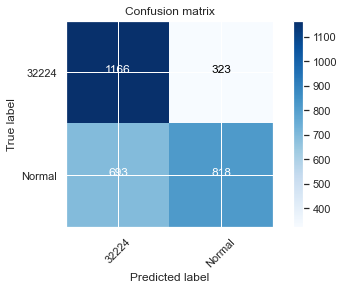

This is the confusion metrics for threat
              precision    recall  f1-score   support

           0       0.66      0.78      0.71      1489
           1       0.73      0.60      0.66      1511

    accuracy                           0.69      3000
   macro avg       0.69      0.69      0.69      3000
weighted avg       0.69      0.69      0.69      3000

Confusion matrix, without normalization


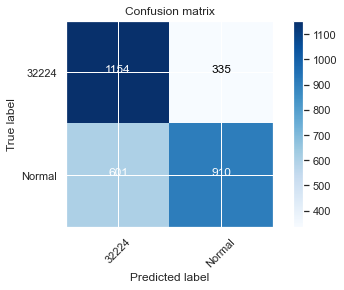

This is the confusion metrics for insult
              precision    recall  f1-score   support

           0       0.61      0.74      0.67      1489
           1       0.67      0.53      0.60      1511

    accuracy                           0.64      3000
   macro avg       0.64      0.64      0.63      3000
weighted avg       0.64      0.64      0.63      3000

Confusion matrix, without normalization


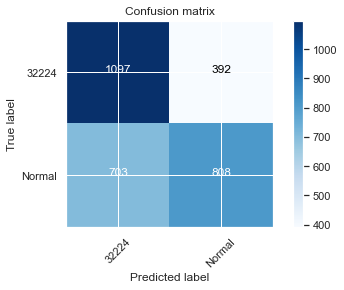

This is the confusion metrics for identity_hate
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       412
           1       0.67      0.53      0.59       431

    accuracy                           0.63       843
   macro avg       0.63      0.63      0.62       843
weighted avg       0.64      0.63      0.62       843

Confusion matrix, without normalization


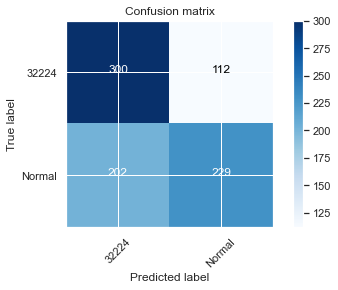

In [171]:
bm_v2=[]
bm_v2.append(conf(X_train_tox_v2,X_test_tox_v2,y_train_tox_v2,y_test_tox_v2,'toxic'))
bm_v2.append(conf(X_train_sev_v2,X_test_sev_v2,y_train_sev_v2,y_test_sev_v2,'severe_toxic'))
bm_v2.append(conf(X_train_obs_v2,X_test_obs_v2,y_train_obs_v2,y_test_obs_v2,'obscene'))
bm_v2.append(conf(X_train_tox_v2,X_test_tox_v2,y_train_tox_v2,y_test_tox_v2,'threat'))
bm_v2.append(conf(X_train_ins_v2,X_test_ins_v2,y_train_ins_v2,y_test_ins_v2,'insult'))
bm_v2.append(conf(X_train_ide_v2,X_test_ide_v2,y_train_ide_v2,y_test_ide_v2,'identity_hate'))

### Turning off smoothing effect in Multinomial NB

**This is a small experiment with Multinomial Naive Bayes model, in this I have changed the value of 'alpha' to make it non smoothing model which will cause a detrimental effects estimating parameters.[4]**

In [215]:
c=MultinomialNB(alpha=0, fit_prior=True, class_prior=None) #changed the parameter 'alpha' to 0.

In [210]:
def confs(X_train_v,X_test_v,y_train_v,y_test_v, label):
    c.fit(X_train_v, y_train_v)
    preds = c.predict(X_test_v)
    score = metrics.accuracy_score(y_test_v, preds)
    class_report=classification_report(y_test_v, preds)
    #F1_score=f1score(y_test_v, preds)
    print('This is the confusion metrics for',label)
    print(class_report)
    cm = metrics.confusion_matrix(y_test_v ,preds)
    plot_confusion_matrix(cm,classes=[i,"Normal"])
    plt.show()

Calling the function confs()

This is the confusion metrics for toxic
              precision    recall  f1-score   support

           0       0.65      0.78      0.71      1489
           1       0.73      0.58      0.64      1511

    accuracy                           0.68      3000
   macro avg       0.69      0.68      0.68      3000
weighted avg       0.69      0.68      0.68      3000

Confusion matrix, without normalization


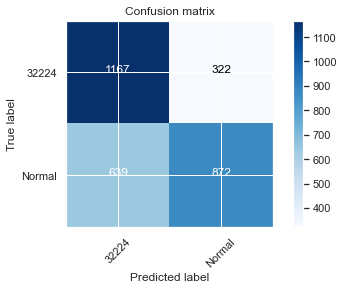

This is the confusion metrics for severe_toxic
              precision    recall  f1-score   support

           0       0.67      0.59      0.63       458
           1       0.66      0.73      0.69       499

    accuracy                           0.66       957
   macro avg       0.66      0.66      0.66       957
weighted avg       0.66      0.66      0.66       957

Confusion matrix, without normalization


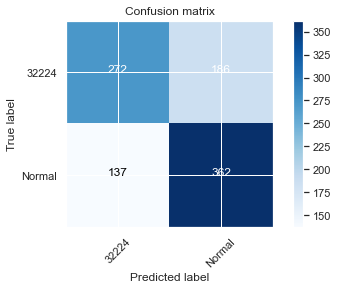

This is the confusion metrics for obscene
              precision    recall  f1-score   support

           0       0.61      0.73      0.67      1489
           1       0.67      0.54      0.60      1511

    accuracy                           0.64      3000
   macro avg       0.64      0.64      0.63      3000
weighted avg       0.64      0.64      0.63      3000

Confusion matrix, without normalization


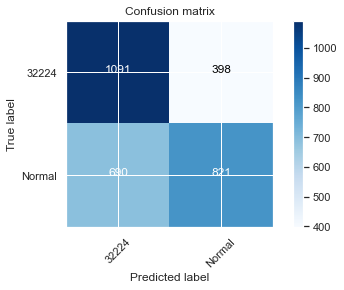

This is the confusion metrics for threat
              precision    recall  f1-score   support

           0       0.65      0.78      0.71      1489
           1       0.73      0.58      0.64      1511

    accuracy                           0.68      3000
   macro avg       0.69      0.68      0.68      3000
weighted avg       0.69      0.68      0.68      3000

Confusion matrix, without normalization


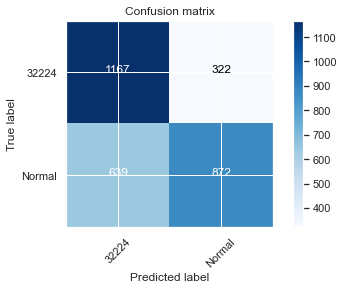

This is the confusion metrics for insult
              precision    recall  f1-score   support

           0       0.59      0.72      0.65      1489
           1       0.65      0.51      0.57      1511

    accuracy                           0.61      3000
   macro avg       0.62      0.62      0.61      3000
weighted avg       0.62      0.61      0.61      3000

Confusion matrix, without normalization


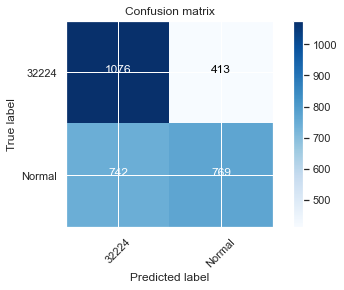

This is the confusion metrics for identity_hate
              precision    recall  f1-score   support

           0       0.59      0.69      0.64       412
           1       0.65      0.54      0.59       431

    accuracy                           0.62       843
   macro avg       0.62      0.62      0.61       843
weighted avg       0.62      0.62      0.61       843

Confusion matrix, without normalization


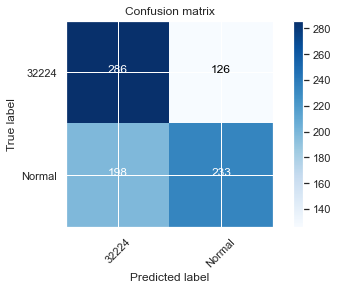

In [145]:
confs(X_train_tox_v2,X_test_tox_v2,y_train_tox_v2,y_test_tox_v2,'toxic')
confs(X_train_sev_v2,X_test_sev_v2,y_train_sev_v2,y_test_sev_v2,'severe_toxic')
confs(X_train_obs_v2,X_test_obs_v2,y_train_obs_v2,y_test_obs_v2,'obscene')
confs(X_train_tox_v2,X_test_tox_v2,y_train_tox_v2,y_test_tox_v2,'threat')
confs(X_train_ins_v2,X_test_ins_v2,y_train_ins_v2,y_test_ins_v2,'insult')
confs(X_train_ide_v2,X_test_ide_v2,y_train_ide_v2,y_test_ide_v2,'identity_hate')

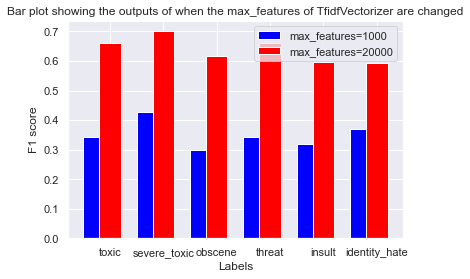

In [212]:
x = np.arange(6)

width = 0.4
  
# plot data in grouped manner of bar type
plt.bar(x-.3, bm_v1, width, color='blue')
plt.bar(x, bm_v2, width, color='red')
plt.xticks(x,test_labels )
plt.title("Bar plot showing the outputs of when the max_features of TfidfVectorizer are changed")
plt.xlabel("Labels")
plt.ylabel("F1 score")
plt.legend(["max_features=1000", "max_features=20000"])
plt.show()

#### Conclusion
The comparison result between the vectoriser which takes more features value than the vectoriser which takes less feature is so predictable. It means that, when we use more features the f1 score becomes better, it implies that the document which will be having lots of words (data) it should have large max_features value.

From the graph which shows the f1 scores of the labels, we can understand that, when we take more feature extraction, the prediction will be more better.

The change in the output after turning off the smoothing effect in multinomial naive bayes is not very much. In spite of that, there is slight decrease in the accuracy and f1 score each label. Therefore, smothing effect is required in text classification to get a best output.

# Experiment  3

**In this experiment, I'm using another model to compare the accuracy and f1 score of the output. 
The model which is used here is Gaussian Naive Bayes.
When compared with the multinomial distribution which takes discrete values, As the name suggests, this model uses guassian (normal) distribution which takes continuous valued features and models.**

I will take the output from TfidfVectorizer which used more max features for extraction.

In [146]:
cg=GaussianNB()

In [160]:
def confg(X_train_v,X_test_v,y_train_v,y_test_v, label):
    cg.fit(X_train_v, y_train_v)
    preds = cg.predict(X_test_v)
    score = metrics.accuracy_score(y_test_v, preds)
    class_report=classification_report(y_test_v, preds)
    F1_score=f1_score(y_test_v, preds)
    print('This is the confusion metrics for',label)
    print(class_report)
    #print(F1_score)
    cm = metrics.confusion_matrix(y_test_v ,preds)
    plot_confusion_matrix(cm,classes=[i,"Normal"]) 
    plt.show()
    return F1_score

Calling the function which is having Gaussian NB model

This is the confusion metrics for toxic
              precision    recall  f1-score   support

           0       0.73      0.57      0.64      1489
           1       0.65      0.80      0.72      1511

    accuracy                           0.68      3000
   macro avg       0.69      0.68      0.68      3000
weighted avg       0.69      0.68      0.68      3000

0.7173071194518915
Confusion matrix, without normalization


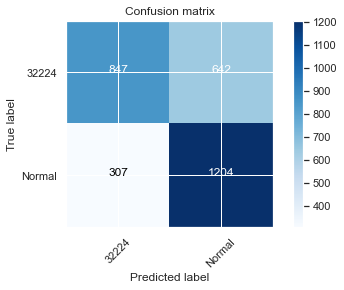

This is the confusion metrics for severe_toxic
              precision    recall  f1-score   support

           0       0.67      0.42      0.52       458
           1       0.60      0.81      0.69       499

    accuracy                           0.62       957
   macro avg       0.63      0.61      0.60       957
weighted avg       0.63      0.62      0.61       957

0.6895368782161235
Confusion matrix, without normalization


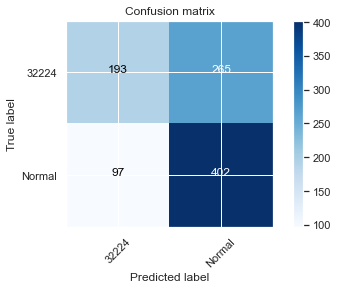

This is the confusion metrics for obscene
              precision    recall  f1-score   support

           0       0.60      0.76      0.67      1489
           1       0.68      0.50      0.57      1511

    accuracy                           0.63      3000
   macro avg       0.64      0.63      0.62      3000
weighted avg       0.64      0.63      0.62      3000

0.5721925133689839
Confusion matrix, without normalization


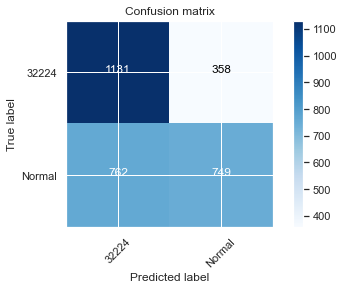

This is the confusion metrics for threat
              precision    recall  f1-score   support

           0       0.73      0.57      0.64      1489
           1       0.65      0.80      0.72      1511

    accuracy                           0.68      3000
   macro avg       0.69      0.68      0.68      3000
weighted avg       0.69      0.68      0.68      3000

0.7173071194518915
Confusion matrix, without normalization


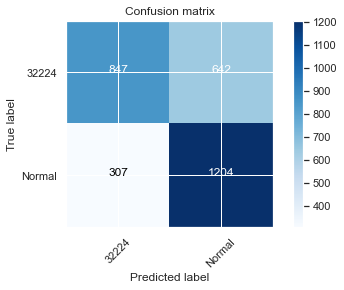

This is the confusion metrics for insult
              precision    recall  f1-score   support

           0       0.57      0.75      0.65      1489
           1       0.64      0.43      0.51      1511

    accuracy                           0.59      3000
   macro avg       0.60      0.59      0.58      3000
weighted avg       0.60      0.59      0.58      3000

0.5130641330166271
Confusion matrix, without normalization


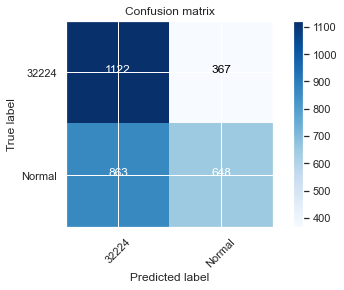

This is the confusion metrics for identity_hate
              precision    recall  f1-score   support

           0       0.64      0.37      0.47       412
           1       0.57      0.80      0.67       431

    accuracy                           0.59       843
   macro avg       0.61      0.59      0.57       843
weighted avg       0.61      0.59      0.57       843

0.667311411992263
Confusion matrix, without normalization


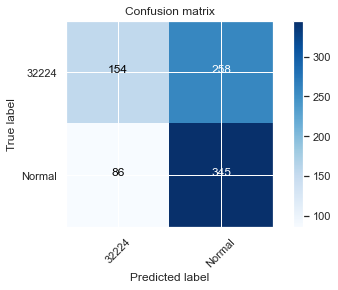

In [206]:
bg=[]
bg.append(confg(X_train_tox_v2,X_test_tox_v2,y_train_tox_v2,y_test_tox_v2,'toxic'))
bg.append(confg(X_train_sev_v2,X_test_sev_v2,y_train_sev_v2,y_test_sev_v2,'severe_toxic'))
bg.append(confg(X_train_obs_v2,X_test_obs_v2,y_train_obs_v2,y_test_obs_v2,'obscene'))
bg.append(confg(X_train_tox_v2,X_test_tox_v2,y_train_tox_v2,y_test_tox_v2,'threat'))
bg.append(confg(X_train_ins_v2,X_test_ins_v2,y_train_ins_v2,y_test_ins_v2,'insult'))
bg.append(confg(X_train_ide_v2,X_test_ide_v2,y_train_ide_v2,y_test_ide_v2,'identity_hate'))

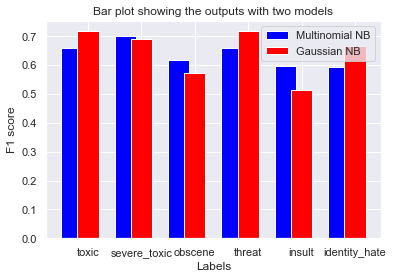

In [208]:
x = np.arange(6)

width = 0.4
  
# plot data in grouped manner of bar type
plt.bar(x-.3, bm_v2, width, color='blue')
plt.bar(x, bg, width, color='red')
plt.xticks(x,test_labels )
plt.title("Bar plot showing the outputs with two models")
plt.xlabel("Labels")
plt.ylabel("F1 score")
plt.legend(["Multinomial NB", "Gaussian NB"])
plt.show()

#### Conclusion

After carefully examining the outputs of the models, I can see that some of the prediction with labels are better in Gaussian NB than Multinomial NB.

The f1 score of toxic, threat and identity_hate is increased a bit when I used Gaussian NB. Gaussian NB will produce a good prediction when the features are distributed normally, maybe in these labels it might have been happened. 

# Experiment 4 

**In this experiment, I'm going to do hyperparameter tuning to find the best parameters for the model to give best output.
The parameter which I will be using here is var_smoothing which means portion of the largest variance of all features that is added to variances for calculation stability[4].**

**Here also I'm taking output from TfidfVectorizer which used more max features for extraction to get the best output.**

In [149]:
# Hyperparameter Tuning
def hyp(X_train,y_train, label):
    parameters = { 
              'var_smoothing': np.logspace(0,-9, num=100)
                 }

    # Run the grid search
    grid_obj = GridSearchCV(cg, parameters)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the clf to the best combination of parameters
    c1 = grid_obj.best_estimator_
    c2 = grid_obj.best_score_

    print('The best parameter optimisation for {} are:'.format(label))
    print('Best Estimator: ', c1)
    print('Best Score: ', c2)

Calling the function hyp() for all 6 labels

In [150]:
hyp(X_train_tox_v2,y_train_tox_v2,'toxic')
hyp(X_train_sev_v2,y_train_sev_v2,'severe_toxic')
hyp(X_train_obs_v2,y_train_obs_v2,'obscene')
hyp(X_train_thr_v2,y_train_thr_v2,'threat')
hyp(X_train_ins_v2,y_train_ins_v2,'insult')
hyp(X_train_ide_v2,y_train_ide_v2,'identity_hate')

The best parameter optimisation for toxic are:
Best Estimator:  GaussianNB(var_smoothing=0.004328761281083057)
Best Score:  0.6792857142857143
The best parameter optimisation for severe_toxic are:
Best Estimator:  GaussianNB(var_smoothing=0.2848035868435802)
Best Score:  0.6856351762121167
The best parameter optimisation for obscene are:
Best Estimator:  GaussianNB(var_smoothing=0.1873817422860384)
Best Score:  0.6511428571428571
The best parameter optimisation for threat are:
Best Estimator:  GaussianNB(var_smoothing=1.2328467394420635e-09)
Best Score:  0.5809902582893913
The best parameter optimisation for insult are:
Best Estimator:  GaussianNB(var_smoothing=0.23101297000831597)
Best Score:  0.6044285714285713
The best parameter optimisation for identity_hate are:
Best Estimator:  GaussianNB(var_smoothing=0.23101297000831597)
Best Score:  0.5861562108471862


#### Conclusion

After running through the above codes for long time, I got the best parameter which should be used for each labels.
The parameter which I used GridSearchCV to find is var_smoothing. All the six labels var_smoothing are found with the best score.

Here are the best values which should be given to var_smoothing:
    <br><b>toxic- var_smoothing: 0.004328761281083057
    <br>severe_toxic- var_smoothing: 0.2848035868435802
    <br>obscene- var_smoothing: 0.1873817422860384
    <br>threat- var_smoothing: 1.2328467394420635e-09
    <br>insult- var_smoothing: 0.23101297000831597
    <br>identity_hate- var_smoothing: 0.23101297000831597

#### Final conclusion

After completing all the above experiments, I found out that, performing lemmitisation in the normalisation process of the words in the dataset will give a better output after fitting into a model. Later on, the dataset had major blow in the balance issue among the labels, which was overcomed by splitting the labels and fitting it separately into a model. The vectoriser which extracted more number of features possesed the best results in the output scores (accuracy and f1 score). The model which I used here is Multinomial NB which is is suitable for classification with discrete features (e.g., word counts for text classification)[3]. I also tried to find the variations in the output by turning off the smoothing effect in Multinomial NB which didn't showed much variations in the output but had a small decrease in the f1 score and accuracy.
Lastly, I tried another model to compare the output of the two models. Here I took Gaussian NB to compare with Multinomial NB and I found that there are some lables whose f1 score and accuracy has been increased slightly maybe because it has normally distributed labels. Then I found out the best parameter values by performing hyperparameter tuning and is listed at the end of the experiment. The best experiment which solved the problem with best output is when I took more feature extraction with the help of TfidfVectorizer for normalisation and the models (Gaussian NB and Multinomial NB) gave almost similar accuracy and f1 scores.

The problem in this topic has been solved by finding the best outputs by experimenting different methods in each stages of the process. Hence, this model can be used to identify the toxic comments and clear out the comments which harass and make other people difficult situation to express their views.

## References

1 https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
<br>2 http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
<br>3 https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
<br>4 https://link.springer.com/chapter/10.1007/978-3-642-23199-5_4